In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Question 1 and 2

In [2]:
data = pd.read_csv(r"C:\Users\hp\Documents\data science resources\titanic_dataset.csv", index_col = 'PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Question 3

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
sel_cols=data[['Age', 'Cabin', 'Embarked']]

In [8]:
sel_cols.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

### Question 4

In [9]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [10]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Question 5

In [12]:
data.shape

(891, 11)

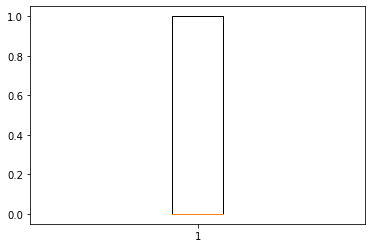

In [13]:
plt.boxplot(data['Survived'])
plt.show()

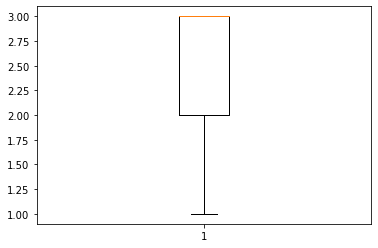

In [14]:
plt.boxplot(data['Pclass'])
plt.show()

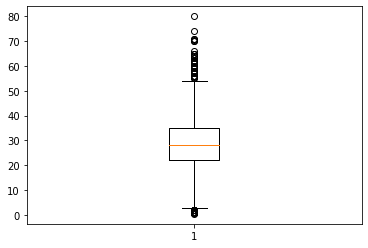

In [15]:
plt.boxplot(data['Age'])
plt.show()

In [16]:
Q1 = np.percentile(data['Fare'], 25)
Q2 = np.percentile(data['Fare'], 50)
Q3 = np.percentile(data['Fare'], 75)
print(Q1, Q2, Q3)

7.9104 14.4542 31.0


In [17]:
IQR=Q3-Q1
IQR

23.0896

In [18]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit, upper_limit)

-26.724 65.6344


In [19]:
outlier = []
for x in data['Age']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [20]:
outlier

[66.0, 71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [21]:
ind = data['Age']>upper_limit
data.loc[ind].index

Int64Index([34, 97, 117, 494, 631, 673, 746, 852], dtype='int64', name='PassengerId')

In [22]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace = True)

In [23]:
data.shape

(849, 11)

### Question 6

In [24]:
x = data.drop('Survived', axis=1)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [25]:
y = data['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 849, dtype: int64

In [26]:
x.shape

(849, 10)

In [27]:
x.Name.nunique()

849

In [28]:
x = data.drop(['Survived','Name', 'Ticket', 'Cabin'], axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [30]:
x['Embarked'] = label_encoder.fit_transform(x['Embarked'])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,2
2,1,female,38.0,1,0,71.2833,0
3,3,female,26.0,0,0,7.9250,2
4,1,female,35.0,1,0,53.1000,2
5,3,male,35.0,0,0,8.0500,2


In [31]:
x['Sex'] = label_encoder.fit_transform(x['Sex'])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [32]:
x1 = x.drop(['Embarked', 'Sex'], axis=1)
x1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [33]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
x1 = min_max.fit_transform(x1)

In [34]:
type(x1)

numpy.ndarray

In [35]:
x1 = pd.DataFrame(x1)
type(x1)

pandas.core.frame.DataFrame

In [36]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [37]:
x=x.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)

In [38]:
x=pd.concat([x,x1], axis=1)
x.head()

,Sex,Embarked,0,1,2,3,4
1,1.0,2.0,0.0,0.701381,0.125,0.0,0.139136
2,0.0,0.0,1.0,0.477417,0.000,0.0,0.015469
3,0.0,2.0,0.0,0.645390,0.125,0.0,0.103644
4,0.0,2.0,1.0,0.645390,0.000,0.0,0.015713
5,1.0,2.0,1.0,0.514744,0.000,0.0,0.016510


In [39]:
x.columns=['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
1,1.0,2.0,0.0,0.701381,0.125,0.0,0.139136
2,0.0,0.0,1.0,0.477417,0.000,0.0,0.015469
3,0.0,2.0,0.0,0.645390,0.125,0.0,0.103644
4,0.0,2.0,1.0,0.645390,0.000,0.0,0.015713
5,1.0,2.0,1.0,0.514744,0.000,0.0,0.016510
